<a href="https://colab.research.google.com/github/RealMyeong/AIFFELTHON/blob/main/JinMyeong/train_data_EDA__2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 11.13(일)

- 11.12(토)에 진행하던 EDA를 이어서 진행함.

먼저 matplotlib 한글 깨짐 현상 해결

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# 한글 지원 폰트
plt.rc('font', family='NanumBarunGothic')

# 마이너스 부호 
plt.rcParams['axes.unicode_minus'] = False

data = pd.read_csv('/content/drive/MyDrive/AIFFELTHON/TUNiB/train_spell_check.csv')

In [3]:
data.head()

,class,conversation,labelling,label_sentence,cleaned_sentence,spell_checked_conversation
0,직장 내 괴롭힘 대화,길동씨 이번에 이것좀 처리해요\n이거 제가 한게 아닌데요\n팀에서 내가 니가가 어딨...,"1,2,1,2,1,2,1,2,1,2",1:길동씨 이번에 이것좀 처리해요\n2:이거 제가 한게 아닌데요\n1:팀에서 내가 ...,길동씨 이번에 이것좀 처리해요\n이거 제가 한게 아닌데요\n팀에서 내가 니가가 어딨...,길동 씨 이번에 이것 좀 처리해요\n이거 제가 한 게 아닌데요\n팀에서 내가 네가 ...
1,기타 괴롭힘 대화,야 너 앞니 왜 그렇게 튀어나왔냐?\n 태어날때부터 그랬어 물어보지마.\n 아 그럼...,"1,2,1,2,1,2,1,2,1,1,1,2,1,1",1:야 너 앞니 왜 그렇게 튀어나왔냐?\n2:태어날때부터 그랬어 물어보지마.\n1:...,야 너 앞니 왜 그렇게 튀어나왔냐?\n태어날때부터 그랬어 물어보지마.\n아 그럼 태...,야 너 앞니 왜 그렇게 튀어나왔냐?\n태어날 때부터 그랬어 물어보지 마.\n아 그럼...
2,갈취 대화,원후야 학원 교재 사야되는데 8만원만 주면 안돼?\n 미안 나 오늘은 진짜 돈이 없...,"1,2,1,2,1,2,1,2,1,2",1:원후야 학원 교재 사야되는데 8만원만 주면 안돼?\n2:미안 나 오늘은 진짜 돈...,원후야 학원 교재 사야되는데 8만원만 주면 안돼?\n미안 나 오늘은 진짜 돈이 없어...,원후야 학원 교재 사야 되는데 8만 원만 주면 안 돼?\n미안 나 오늘은 진짜 돈이...
3,갈취 대화,너 저번에 술먹은 날 기억해?\n아니 왜?\n야 300만원만 가져와.\n뭔 소리야....,"1,2,1,2,1,2,1,2,1,2",1:너 저번에 술먹은 날 기억해?\n2:아니 왜?\n1:야 300만원만 가져와.\n...,너 저번에 술먹은 날 기억해?\n아니 왜?\n야 300만원만 가져와.\n뭔 소리야....,너 저번에 술 먹은 날 기억해?\n아니 왜?\n야 300만 원만 가져와.\n뭔 소리...
4,협박 대화,너 또 내말 무시하냐?\n 이새끼 널 좆으로 보나본데?\n아냐 진짜 시간이 없었어 ...,"1,1,2,1,1,2,1,2,1,1",1:너 또 내말 무시하냐?\n1:이새끼 널 좆으로 보나본데?\n2:아냐 진짜 시간이...,너 또 내말 무시하냐?\n이새끼 널 좆으로 보나본데?\n아냐 진짜 시간이 없었어 미...,너 또 내말 무시하냐?\n이 새끼 널 좆으로 보나 본데?\n아냐 진짜 시간이 없었어...


## 1. 대화의 공격성 유형에 따라서 분리
1. 협박
2. 갈취
3. 직장 내 괴롭힘
4. 기타 괴롭힘

In [4]:
data.columns

Index(['class', 'conversation', 'labelling', 'label_sentence',
       'cleaned_sentence', 'spell_checked_conversation'],
      dtype='object')

In [5]:
data['class'].value_counts()

기타 괴롭힘 대화      1065
갈취 대화           978
직장 내 괴롭힘 대화     975
협박 대화           895
Name: class, dtype: int64

In [6]:
# 협박 대화
threat = data[data['class']=='협박 대화']

# 갈취 대화
extort = data[data['class']=='갈취 대화']

# 직장 내 괴롭힘
workplace_bull = data[data['class']=='직장 내 괴롭힘 대화']

# 기타 괴롭힘
other_bull = data[data['class']=='기타 괴롭힘 대화']

In [7]:
print(f'협박 대화 개수 : {len(threat)}')
print(f'갈취 대화 개수 : {len(extort)}')
print(f'직장 내 괴롭힘 대화 개수 : {len(workplace_bull)}')
print(f'기타 괴롭힘 대화 개수 : {len(other_bull)}')

협박 대화 개수 : 895
갈취 대화 개수 : 978
직장 내 괴롭힘 대화 개수 : 975
기타 괴롭힘 대화 개수 : 1065


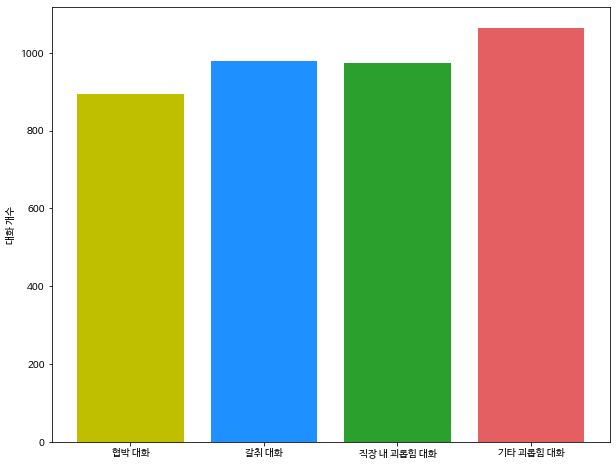

In [8]:
plt.figure(figsize=(10,8))
plt.bar(x = ['협박 대화', '갈취 대화', '직장 내 괴롭힘 대화', '기타 괴롭힘 대화'], width = 0.8, height = [len(threat), len(extort), len(workplace_bull), len(other_bull)], color=['y', 'dodgerblue', 'C2', '#e35f62'])
plt.ylabel('대화 개수')
plt.show()

맞춤법 검사가 완료된 데이터로 진행하겠음.

In [9]:
non_label = data['spell_checked_conversation']

In [10]:
non_label.head()

0    길동 씨 이번에 이것 좀 처리해요\n이거 제가 한 게 아닌데요\n팀에서 내가 네가 ...
1    야 너 앞니 왜 그렇게 튀어나왔냐?\n태어날 때부터 그랬어 물어보지 마.\n아 그럼...
2    원후야 학원 교재 사야 되는데 8만 원만 주면 안 돼?\n미안 나 오늘은 진짜 돈이...
3    너 저번에 술 먹은 날 기억해?\n아니 왜?\n야 300만 원만 가져와.\n뭔 소리...
4    너 또 내말 무시하냐?\n이 새끼 널 좆으로 보나 본데?\n아냐 진짜 시간이 없었어...
Name: spell_checked_conversation, dtype: object

In [11]:
def build_corpus(sen):

  corpus = sen.split()

  return corpus  

In [12]:
# 협박 대화 말뭉치
threat_corpus = [build_corpus(sen) for sen in threat['conversation']]

# 갈취 대화 말뭉치
extort_corpus = [build_corpus(sen) for sen in extort['conversation']]

# 직장 내 괴롭힘 대화 말뭉치
workplace_bull_corpus = [build_corpus(sen) for sen in workplace_bull['conversation']]

# 기타 괴롭힘 대화 말뭉치
other_bull_corpus = [build_corpus(sen) for sen in other_bull['conversation']]

### 1. 협박 대화

문장의 최단 길이 :  12
문장의 최장 길이 :  223
문장의 평균 길이 :  61


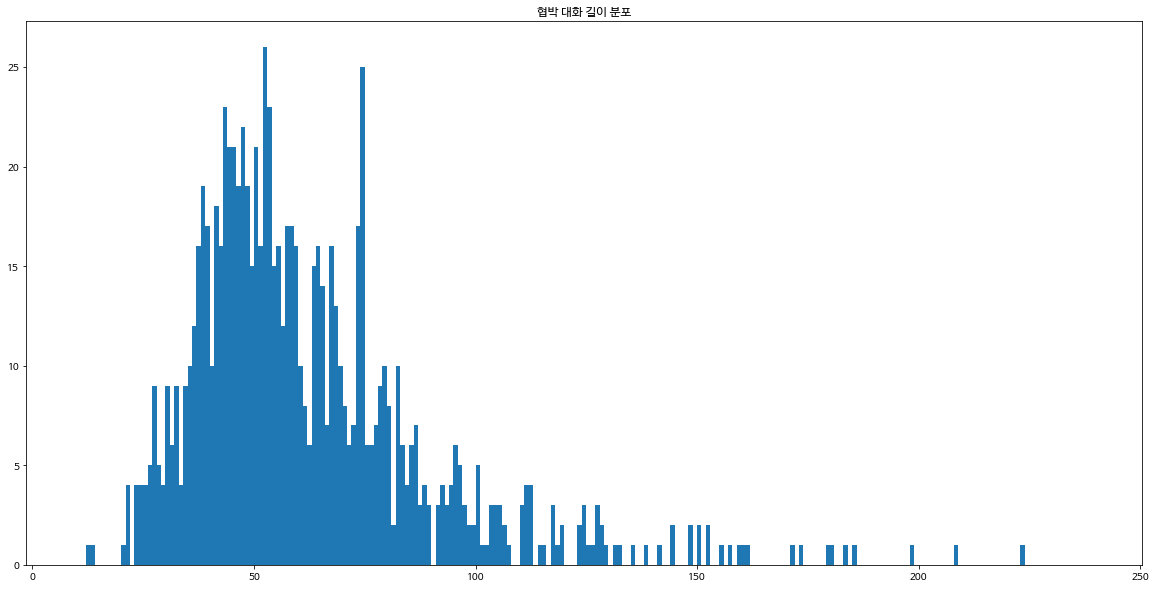

In [17]:
# 협박 대화 길이 분포
min_len = 999
max_len = 0
sum_len = 0

for sen in threat_corpus:
  length = len(sen)
  if min_len > length:
    min_len = length
  if max_len < length:
    max_len = length
  sum_len += length

print('문장의 최단 길이 : ', min_len)
print('문장의 최장 길이 : ', max_len)
print('문장의 평균 길이 : ', sum_len //len(threat_corpus))

sentence_length = [len(x) for x in threat_corpus]

plt.hist(sentence_length, bins = np.arange(10, 240))
plt.title('협박 대화 길이 분포')
plt.show()

<BarContainer object of 30 artists>

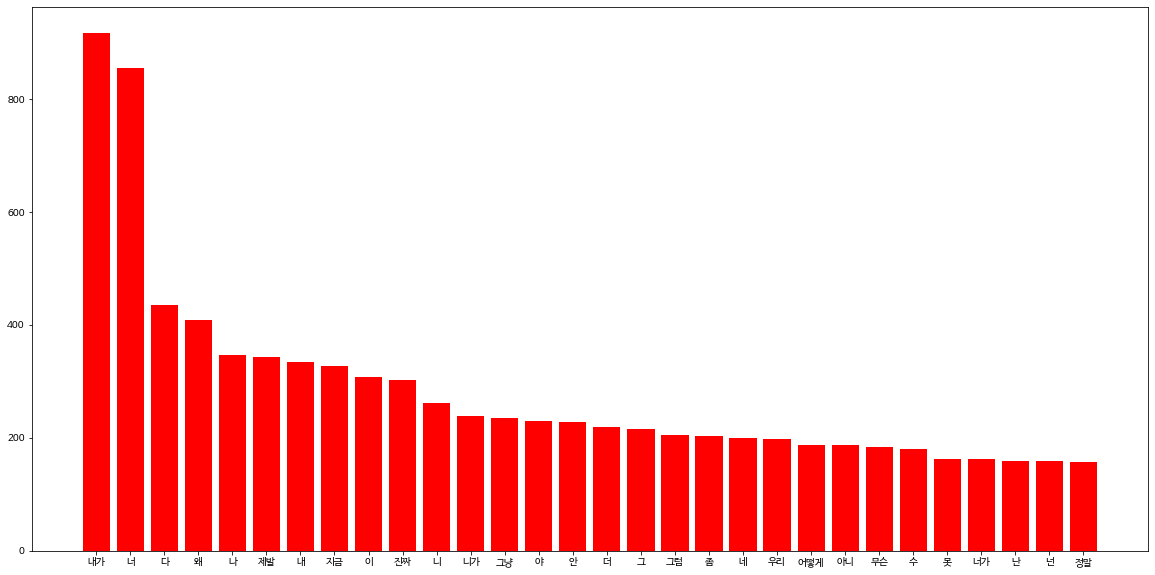

In [14]:
from collections import defaultdict

# 협박 대화 내의 단어 빈도 확인
token = []

for x in threat_corpus:
  for i in x:
    token.append(i)
    
dic = defaultdict(int)
for word in token:
  dic[word] += 1

top = sorted(dic.items(), key=lambda x : x[1], reverse=True)[:30] # 1

x, y = zip(*top) # 2
plt.rcParams['figure.figsize'] = (20, 10)
plt.bar(x, y, color='red')

### 2. 갈취 대화

문장의 최단 길이 :  10
문장의 최장 길이 :  185
문장의 평균 길이 :  55


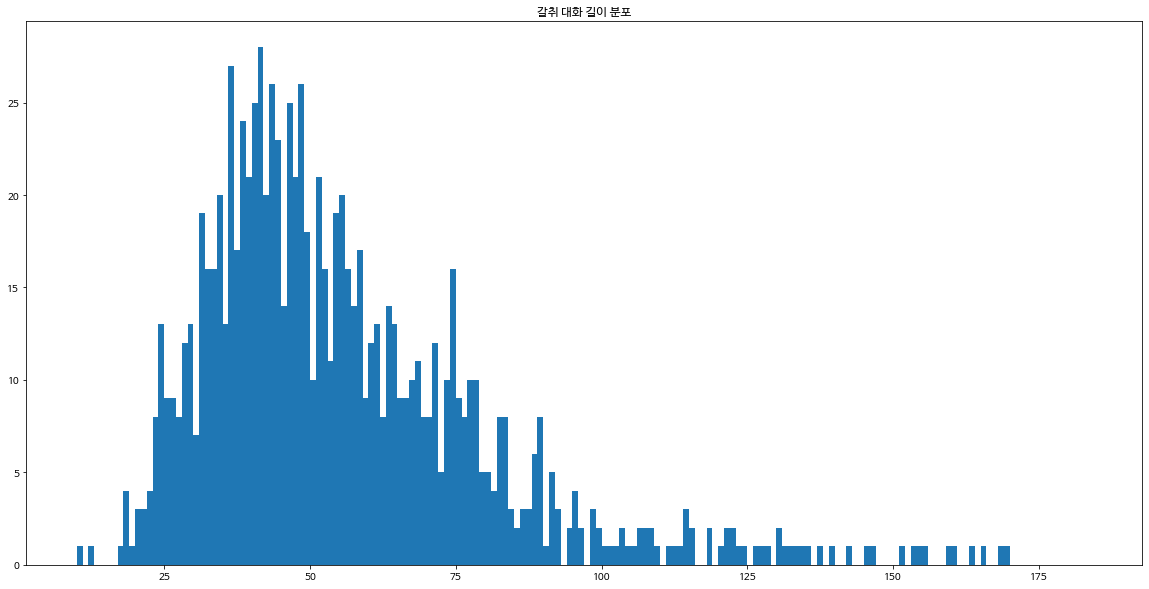

In [19]:
# 갈취 대화 길이 분포
min_len = 999
max_len = 0
sum_len = 0

for sen in extort_corpus:
  length = len(sen)
  if min_len > length:
    min_len = length
  if max_len < length:
    max_len = length
  sum_len += length

print('문장의 최단 길이 : ', min_len)
print('문장의 최장 길이 : ', max_len)
print('문장의 평균 길이 : ', sum_len //len(extort_corpus))

sentence_length = [len(x) for x in extort_corpus]

plt.hist(sentence_length, bins = np.arange(min_len, max_len))
plt.title('갈취 대화 길이 분포')
plt.show()

<BarContainer object of 30 artists>

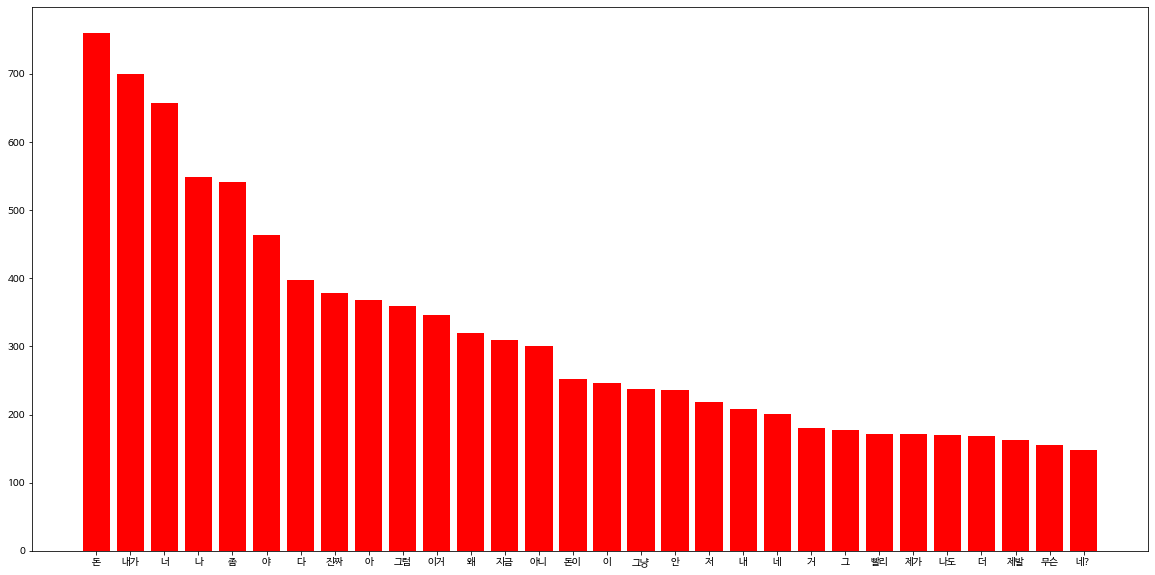

In [20]:
# 갈취 대화 내의 단어 빈도 확인
token = []

for x in extort_corpus:
  for i in x:
    token.append(i)
    
dic = defaultdict(int)
for word in token:
  dic[word] += 1

top = sorted(dic.items(), key=lambda x : x[1], reverse=True)[:30] # 1

x, y = zip(*top) # 2
plt.rcParams['figure.figsize'] = (20, 10)
plt.bar(x, y, color='red')

### 3. 직장 내 괴롭힘 대화

문장의 최단 길이 :  10
문장의 최장 길이 :  213
문장의 평균 길이 :  58


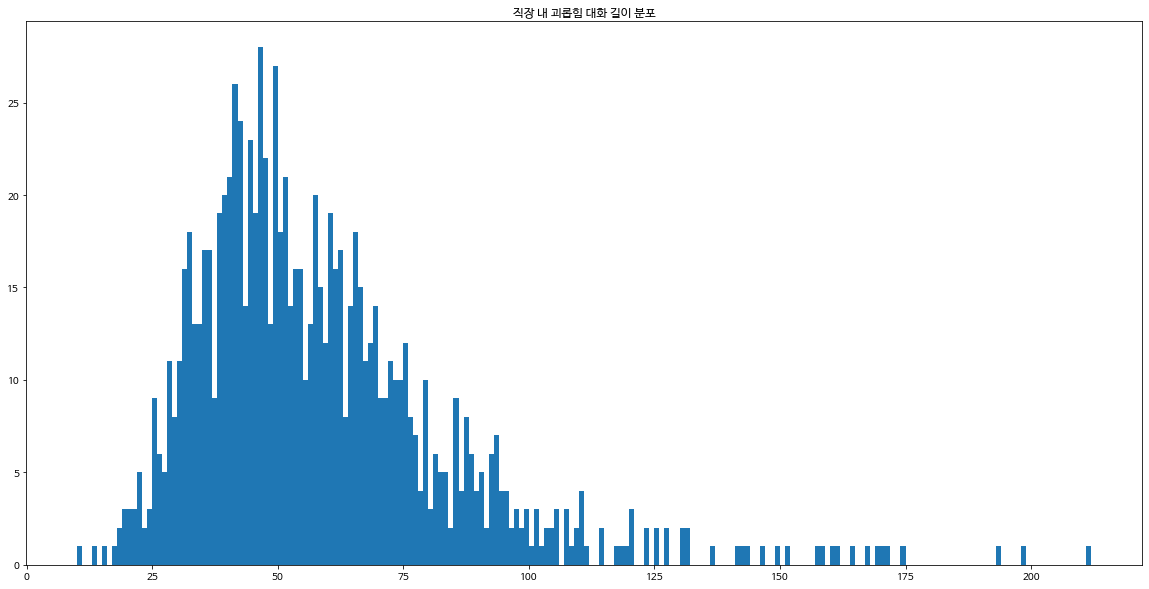

In [22]:
# 직장 내 괴롭힘 대화 길이 분포
min_len = 999
max_len = 0
sum_len = 0

for sen in workplace_bull_corpus:
  length = len(sen)
  if min_len > length:
    min_len = length
  if max_len < length:
    max_len = length
  sum_len += length

print('문장의 최단 길이 : ', min_len)
print('문장의 최장 길이 : ', max_len)
print('문장의 평균 길이 : ', sum_len //len(workplace_bull_corpus))

sentence_length = [len(x) for x in workplace_bull_corpus]

plt.hist(sentence_length, bins = np.arange(min_len, max_len))
plt.title('직장 내 괴롭힘 대화 길이 분포')
plt.show()

<BarContainer object of 30 artists>

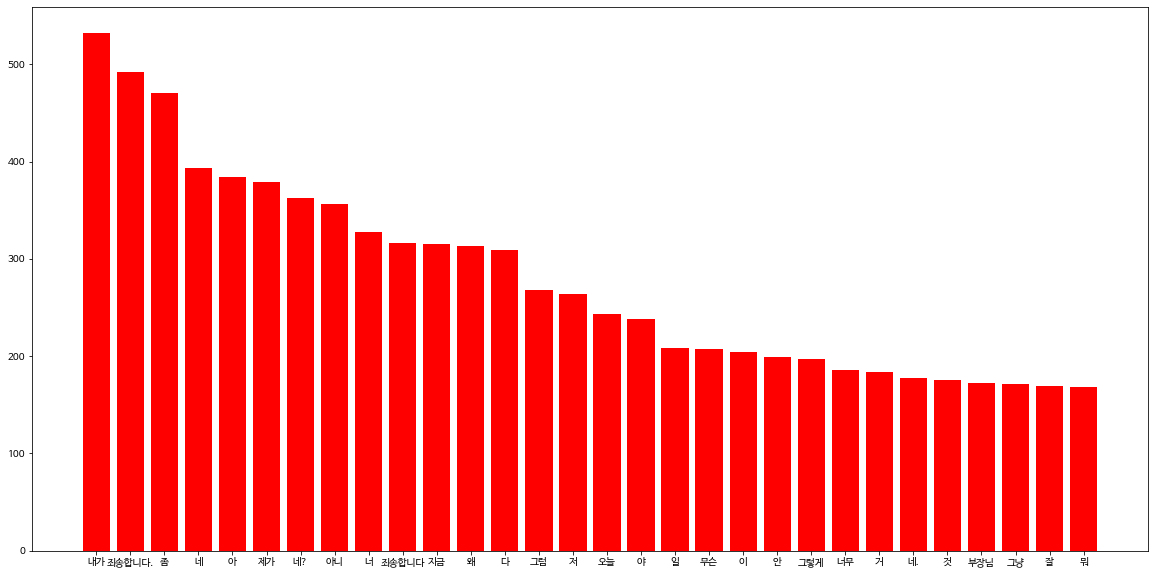

In [23]:
# 직장 내 괴롭힘 대화 내의 단어 빈도 확인
token = []

for x in workplace_bull_corpus:
  for i in x:
    token.append(i)
    
dic = defaultdict(int)
for word in token:
  dic[word] += 1

top = sorted(dic.items(), key=lambda x : x[1], reverse=True)[:30] # 1

x, y = zip(*top) # 2
plt.rcParams['figure.figsize'] = (20, 10)
plt.bar(x, y, color='red')

### 4. 기타 괴롭힘 대화

문장의 최단 길이 :  12
문장의 최장 길이 :  222
문장의 평균 길이 :  53


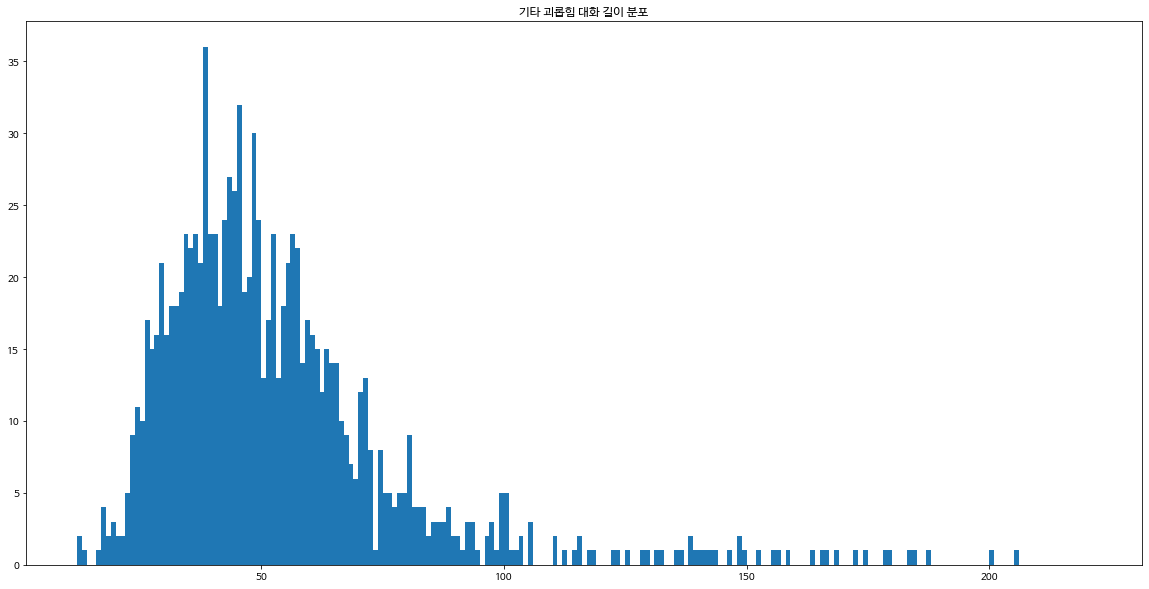

In [25]:
# 기타 괴롭힘 대화 길이 분포
min_len = 999
max_len = 0
sum_len = 0

for sen in other_bull_corpus:
  length = len(sen)
  if min_len > length:
    min_len = length
  if max_len < length:
    max_len = length
  sum_len += length

print('문장의 최단 길이 : ', min_len)
print('문장의 최장 길이 : ', max_len)
print('문장의 평균 길이 : ', sum_len //len(other_bull_corpus))

sentence_length = [len(x) for x in other_bull_corpus]

plt.hist(sentence_length, bins = np.arange(min_len, max_len))
plt.title('기타 괴롭힘 대화 길이 분포')
plt.show()

<BarContainer object of 30 artists>

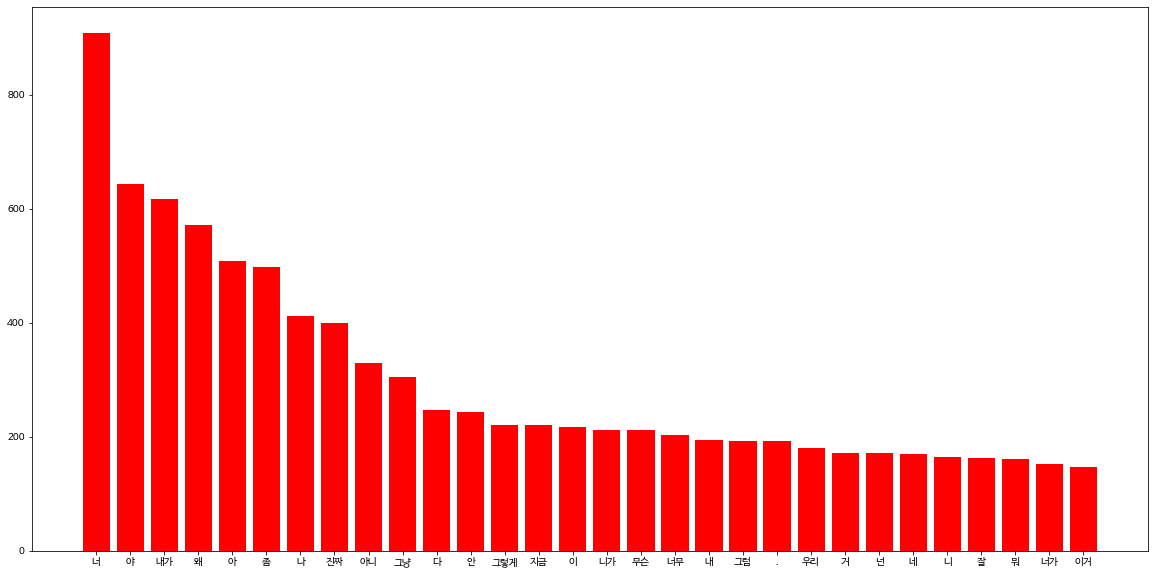

In [26]:
# 기타 괴롭힘 대화 내의 단어 빈도 확인
token = []

for x in other_bull_corpus:
  for i in x:
    token.append(i)
    
dic = defaultdict(int)
for word in token:
  dic[word] += 1

top = sorted(dic.items(), key=lambda x : x[1], reverse=True)[:30] # 1

x, y = zip(*top) # 2
plt.rcParams['figure.figsize'] = (20, 10)
plt.bar(x, y, color='red')

## 2. 화자에 따른 분석

먼저 맞춤법 검사가 완료된 문장에 공격자, 피해자 라벨링을 해줌

In [27]:
data.head()

,class,conversation,labelling,label_sentence,cleaned_sentence,spell_checked_conversation
0,직장 내 괴롭힘 대화,길동씨 이번에 이것좀 처리해요\n이거 제가 한게 아닌데요\n팀에서 내가 니가가 어딨...,"1,2,1,2,1,2,1,2,1,2",1:길동씨 이번에 이것좀 처리해요\n2:이거 제가 한게 아닌데요\n1:팀에서 내가 ...,길동씨 이번에 이것좀 처리해요\n이거 제가 한게 아닌데요\n팀에서 내가 니가가 어딨...,길동 씨 이번에 이것 좀 처리해요\n이거 제가 한 게 아닌데요\n팀에서 내가 네가 ...
1,기타 괴롭힘 대화,야 너 앞니 왜 그렇게 튀어나왔냐?\n 태어날때부터 그랬어 물어보지마.\n 아 그럼...,"1,2,1,2,1,2,1,2,1,1,1,2,1,1",1:야 너 앞니 왜 그렇게 튀어나왔냐?\n2:태어날때부터 그랬어 물어보지마.\n1:...,야 너 앞니 왜 그렇게 튀어나왔냐?\n태어날때부터 그랬어 물어보지마.\n아 그럼 태...,야 너 앞니 왜 그렇게 튀어나왔냐?\n태어날 때부터 그랬어 물어보지 마.\n아 그럼...
2,갈취 대화,원후야 학원 교재 사야되는데 8만원만 주면 안돼?\n 미안 나 오늘은 진짜 돈이 없...,"1,2,1,2,1,2,1,2,1,2",1:원후야 학원 교재 사야되는데 8만원만 주면 안돼?\n2:미안 나 오늘은 진짜 돈...,원후야 학원 교재 사야되는데 8만원만 주면 안돼?\n미안 나 오늘은 진짜 돈이 없어...,원후야 학원 교재 사야 되는데 8만 원만 주면 안 돼?\n미안 나 오늘은 진짜 돈이...
3,갈취 대화,너 저번에 술먹은 날 기억해?\n아니 왜?\n야 300만원만 가져와.\n뭔 소리야....,"1,2,1,2,1,2,1,2,1,2",1:너 저번에 술먹은 날 기억해?\n2:아니 왜?\n1:야 300만원만 가져와.\n...,너 저번에 술먹은 날 기억해?\n아니 왜?\n야 300만원만 가져와.\n뭔 소리야....,너 저번에 술 먹은 날 기억해?\n아니 왜?\n야 300만 원만 가져와.\n뭔 소리...
4,협박 대화,너 또 내말 무시하냐?\n 이새끼 널 좆으로 보나본데?\n아냐 진짜 시간이 없었어 ...,"1,1,2,1,1,2,1,2,1,1",1:너 또 내말 무시하냐?\n1:이새끼 널 좆으로 보나본데?\n2:아냐 진짜 시간이...,너 또 내말 무시하냐?\n이새끼 널 좆으로 보나본데?\n아냐 진짜 시간이 없었어 미...,너 또 내말 무시하냐?\n이 새끼 널 좆으로 보나 본데?\n아냐 진짜 시간이 없었어...


In [32]:
def label_mapping(data):

  label_sentence = []
  cleaned_sentence = []
  error_sentence = []

  for row in data.iterrows():
    conversation = row[1]['spell_checked_conversation'].split('\n')
    labelling = row[1]['labelling'].split(',')
    conversation = [x for x in conversation if x != '']

    try:
      label_sen = []
      cleaned_sen = []

      for i in range(len(labelling)):

        sen = labelling[i] + ':' + conversation[i].strip()
        label_sen.append(sen)

        cleaned_sen.append(conversation[i].strip())
      label_sentence.append('\n'.join(label_sen))
      cleaned_sentence.append('\n'.join(cleaned_sen))

    except:
      label_sen = []
      cleaned_sen = []

      labelling = row[1]['labelling'].split(',')
      labelling.pop()

      for i in range(len(labelling)):
        sen = labelling[i] + ':' + conversation[i].strip()
        label_sen.append(sen)

        cleaned_sen.append(conversation[i].strip())
        
      label_sentence.append('\n'.join(label_sen))
      error_sentence.append(label_sen)
      cleaned_sentence.append('\n'.join(cleaned_sen))

  return label_sentence, error_sentence, cleaned_sentence

In [33]:
label_sentence, error_sentence, cleaned_sentence = label_mapping(data)

In [34]:
label_sentence[1]

'1:야 너 앞니 왜 그렇게 튀어나왔냐?\n2:태어날 때부터 그랬어 물어보지 마.\n1:아 그럼 태어날 때부터 못 생기 거네?\n2:괴롭히지 마 제발\n1:아니 너는 내가 말만 하면 괴롭혔다고 한다?\n2:혼자 있게 해줘\n1:제 혼자 있는 거 같아서 말 걸어줬더니만 나쁜 사람 만드네 그래놓고 왕따시켰다고 말하지나 마 진짜 성격이 왜 그따위야? 가정교육 잘못 받았냐\n2:부모님은 건드리지 마\n1:어쭈 발끈한다 지도 자식이라 이거지\n1:얘 왜 우냐?\n1:아니 몰라 제 혼자 갑자기 화내\n2:제발 혼자 있게 해줘 내버려 둬\n1:이거 왜 또 제 혼자 감성적이냐? 애니 그만 보라 했지\n1:완전 얘 코미디언 아니냐'

In [36]:
data.insert(6, 'sp_checked_label_sentence', label_sentence)

In [37]:
data.head()

,class,conversation,labelling,label_sentence,cleaned_sentence,spell_checked_conversation,sp_checked_label_sentence
0,직장 내 괴롭힘 대화,길동씨 이번에 이것좀 처리해요\n이거 제가 한게 아닌데요\n팀에서 내가 니가가 어딨...,"1,2,1,2,1,2,1,2,1,2",1:길동씨 이번에 이것좀 처리해요\n2:이거 제가 한게 아닌데요\n1:팀에서 내가 ...,길동씨 이번에 이것좀 처리해요\n이거 제가 한게 아닌데요\n팀에서 내가 니가가 어딨...,길동 씨 이번에 이것 좀 처리해요\n이거 제가 한 게 아닌데요\n팀에서 내가 네가 ...,1:길동 씨 이번에 이것 좀 처리해요\n2:이거 제가 한 게 아닌데요\n1:팀에서 ...
1,기타 괴롭힘 대화,야 너 앞니 왜 그렇게 튀어나왔냐?\n 태어날때부터 그랬어 물어보지마.\n 아 그럼...,"1,2,1,2,1,2,1,2,1,1,1,2,1,1",1:야 너 앞니 왜 그렇게 튀어나왔냐?\n2:태어날때부터 그랬어 물어보지마.\n1:...,야 너 앞니 왜 그렇게 튀어나왔냐?\n태어날때부터 그랬어 물어보지마.\n아 그럼 태...,야 너 앞니 왜 그렇게 튀어나왔냐?\n태어날 때부터 그랬어 물어보지 마.\n아 그럼...,1:야 너 앞니 왜 그렇게 튀어나왔냐?\n2:태어날 때부터 그랬어 물어보지 마.\n...
2,갈취 대화,원후야 학원 교재 사야되는데 8만원만 주면 안돼?\n 미안 나 오늘은 진짜 돈이 없...,"1,2,1,2,1,2,1,2,1,2",1:원후야 학원 교재 사야되는데 8만원만 주면 안돼?\n2:미안 나 오늘은 진짜 돈...,원후야 학원 교재 사야되는데 8만원만 주면 안돼?\n미안 나 오늘은 진짜 돈이 없어...,원후야 학원 교재 사야 되는데 8만 원만 주면 안 돼?\n미안 나 오늘은 진짜 돈이...,1:원후야 학원 교재 사야 되는데 8만 원만 주면 안 돼?\n2:미안 나 오늘은 진...
3,갈취 대화,너 저번에 술먹은 날 기억해?\n아니 왜?\n야 300만원만 가져와.\n뭔 소리야....,"1,2,1,2,1,2,1,2,1,2",1:너 저번에 술먹은 날 기억해?\n2:아니 왜?\n1:야 300만원만 가져와.\n...,너 저번에 술먹은 날 기억해?\n아니 왜?\n야 300만원만 가져와.\n뭔 소리야....,너 저번에 술 먹은 날 기억해?\n아니 왜?\n야 300만 원만 가져와.\n뭔 소리...,1:너 저번에 술 먹은 날 기억해?\n2:아니 왜?\n1:야 300만 원만 가져와....
4,협박 대화,너 또 내말 무시하냐?\n 이새끼 널 좆으로 보나본데?\n아냐 진짜 시간이 없었어 ...,"1,1,2,1,1,2,1,2,1,1",1:너 또 내말 무시하냐?\n1:이새끼 널 좆으로 보나본데?\n2:아냐 진짜 시간이...,너 또 내말 무시하냐?\n이새끼 널 좆으로 보나본데?\n아냐 진짜 시간이 없었어 미...,너 또 내말 무시하냐?\n이 새끼 널 좆으로 보나 본데?\n아냐 진짜 시간이 없었어...,1:너 또 내말 무시하냐?\n1:이 새끼 널 좆으로 보나 본데?\n2:아냐 진짜 시...


In [45]:
# 공격자, 피해자 말뭉치 생성
# 공격자는 1, 피해자는 2로 라벨링했음.

attacker = []
victim = []

for row in data['sp_checked_label_sentence']:

  sen_list = row.split('\n')
  at_sen = []
  vic_sen = []

  for i in sen_list:
    if i[0] == '1':
      attacker_sen = i[2:]
      at_sen.append(attacker_sen)
    elif i[0] == '2':
      victim_sen = i[2:]
      vic_sen.append(victim_sen)
  
  at_conversation = ' '.join(at_sen)
  vic_conversation = ' '.join(vic_sen)

  attacker.append(at_conversation)
  victim.append(vic_conversation)
    

In [69]:
# EDA를 위해 한글만 남기고 다 공백으로 바꿔줌
import re

at_clean = []
vic_clean = []

for a, v in zip(attacker, victim):
  a = re.sub(r'[^가-힣]', ' ', a)
  a = a.strip()
  at_clean.append(a)

  v = re.sub(r'[^가-힣]', ' ', v)
  v = v.strip()
  vic_clean.append(v)

In [70]:
at_clean[1]

'야 너 앞니 왜 그렇게 튀어나왔냐  아 그럼 태어날 때부터 못 생기 거네  아니 너는 내가 말만 하면 괴롭혔다고 한다  제 혼자 있는 거 같아서 말 걸어줬더니만 나쁜 사람 만드네 그래놓고 왕따시켰다고 말하지나 마 진짜 성격이 왜 그따위야  가정교육 잘못 받았냐 어쭈 발끈한다 지도 자식이라 이거지 얘 왜 우냐  아니 몰라 제 혼자 갑자기 화내 이거 왜 또 제 혼자 감성적이냐  애니 그만 보라 했지 완전 얘 코미디언 아니냐'

In [71]:
vic_clean[1]

'태어날 때부터 그랬어 물어보지 마  괴롭히지 마 제발 혼자 있게 해줘 부모님은 건드리지 마 제발 혼자 있게 해줘 내버려 둬'

### 1. 공격자 대화 확인

In [72]:
# 공격자 대화 말뭉치
attacker_corpus = [build_corpus(sen) for sen in at_clean]

In [73]:
for i in attacker_corpus:
  if len(i)==0:
    print(i, attacker_corpus.index(i))
    break

[] 2695


In [74]:
data['spell_checked_conversation'][2695]

'그게 사실이야?\n죄송합니다 그게.\n솔직히 네가 그랬을 거라고 생각하지 않아.\n. 아닙니다\n한테 상황 들었어. 괘씸한 가 아픈 아이 가지고 협박을 했다던데.\n그건.!\n나 믿지? 말해봐.\n제가 그 일을 하지 않으면 제 아이 병원비를 끊을 것이며 최대한 고통스럽게 질식시킬 거라고.\n이런 그 돈은 걱정 말아. 내가 대신 내줄게.\n네 회장님.'

In [75]:
data['sp_checked_label_sentence'][2695]

'2:그게 사실이야?\n2:죄송합니다 그게.\n2:솔직히 네가 그랬을 거라고 생각하지 않아.\n2:. 아닙니다\n2:한테 상황 들었어. 괘씸한 가 아픈 아이 가지고 협박을 했다던데.\n2:그건.!\n2:나 믿지? 말해봐.\n2:제가 그 일을 하지 않으면 제 아이 병원비를 끊을 것이며 최대한 고통스럽게 질식시킬 거라고.\n2:이런 그 돈은 걱정 말아. 내가 대신 내줄게.\n2:네 회장님.'

문장의 최단 길이 :  0
문장의 최장 길이 :  196
문장의 평균 길이 :  42


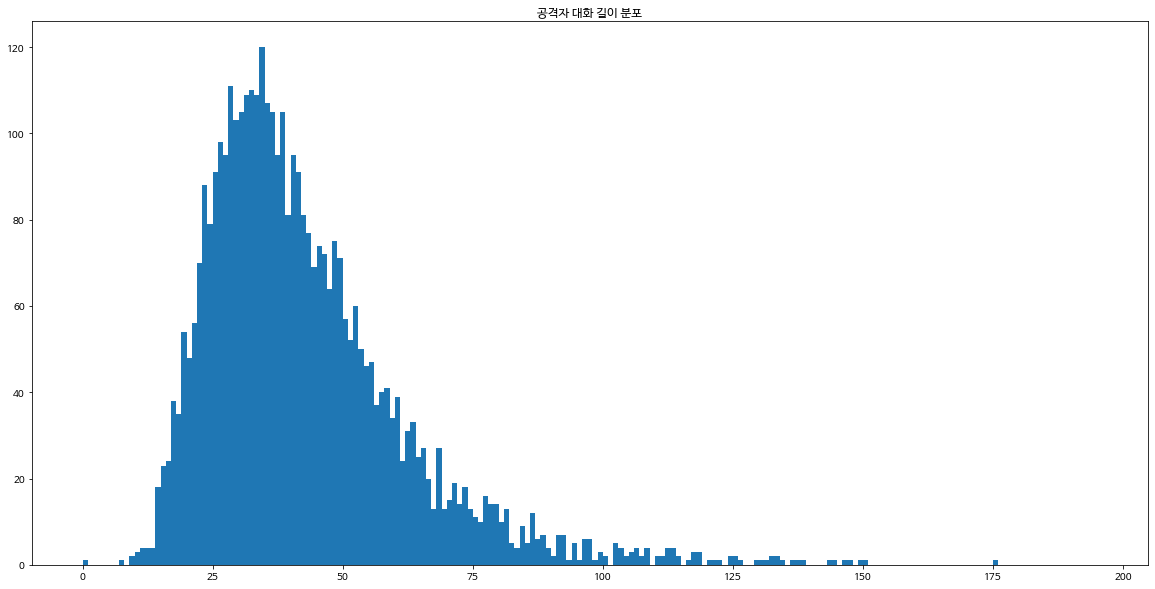

In [76]:
# 공격자 대화 길이 분포
min_len = 999
max_len = 0
sum_len = 0

for sen in attacker_corpus:
  length = len(sen)
  if min_len > length:
    min_len = length
  if max_len < length:
    max_len = length
  sum_len += length

print('문장의 최단 길이 : ', min_len)
print('문장의 최장 길이 : ', max_len)
print('문장의 평균 길이 : ', sum_len //len(attacker_corpus))

sentence_length = [len(x) for x in attacker_corpus]

plt.hist(sentence_length, bins = np.arange(min_len, max_len))
plt.title('공격자 대화 길이 분포')
plt.show()

<BarContainer object of 30 artists>

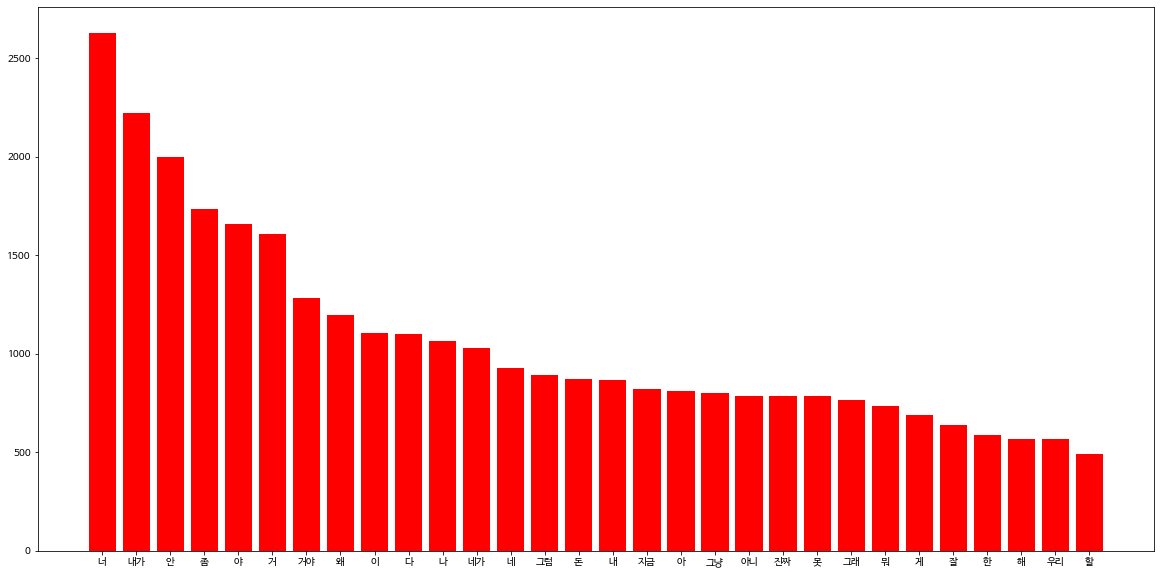

In [77]:
# 공격자 대화 내의 단어 빈도 확인
token = []

for x in attacker_corpus:
  for i in x:
    token.append(i)
    
dic = defaultdict(int)
for word in token:
  dic[word] += 1

top = sorted(dic.items(), key=lambda x : x[1], reverse=True)[:30] # 1

x, y = zip(*top) # 2
plt.rcParams['figure.figsize'] = (20, 10)
plt.bar(x, y, color='red')

### 2. 피해자 대화 확인

In [79]:
# 피해자 대화 말뭉치
victim_corpus = [build_corpus(sen) for sen in vic_clean]

문장의 최단 길이 :  0
문장의 최장 길이 :  106
문장의 평균 길이 :  22


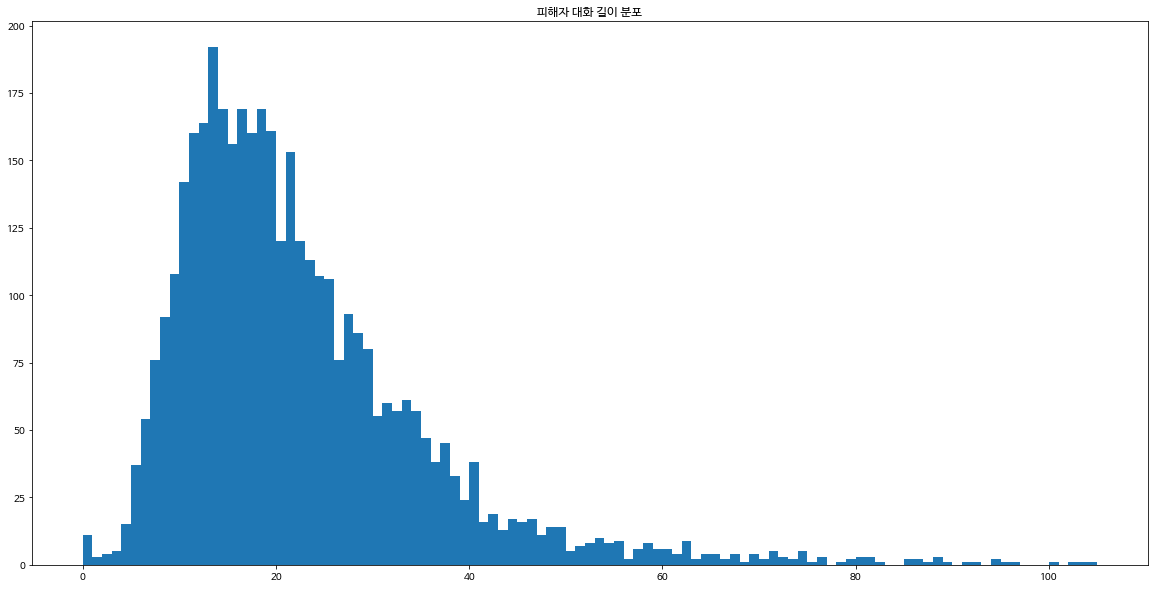

In [80]:
# 피해자 대화 길이 분포
min_len = 999
max_len = 0
sum_len = 0

for sen in victim_corpus:
  length = len(sen)
  if min_len > length:
    min_len = length
  if max_len < length:
    max_len = length
  sum_len += length

print('문장의 최단 길이 : ', min_len)
print('문장의 최장 길이 : ', max_len)
print('문장의 평균 길이 : ', sum_len //len(victim_corpus))

sentence_length = [len(x) for x in victim_corpus]

plt.hist(sentence_length, bins = np.arange(min_len, max_len))
plt.title('피해자 대화 길이 분포')
plt.show()

<BarContainer object of 30 artists>

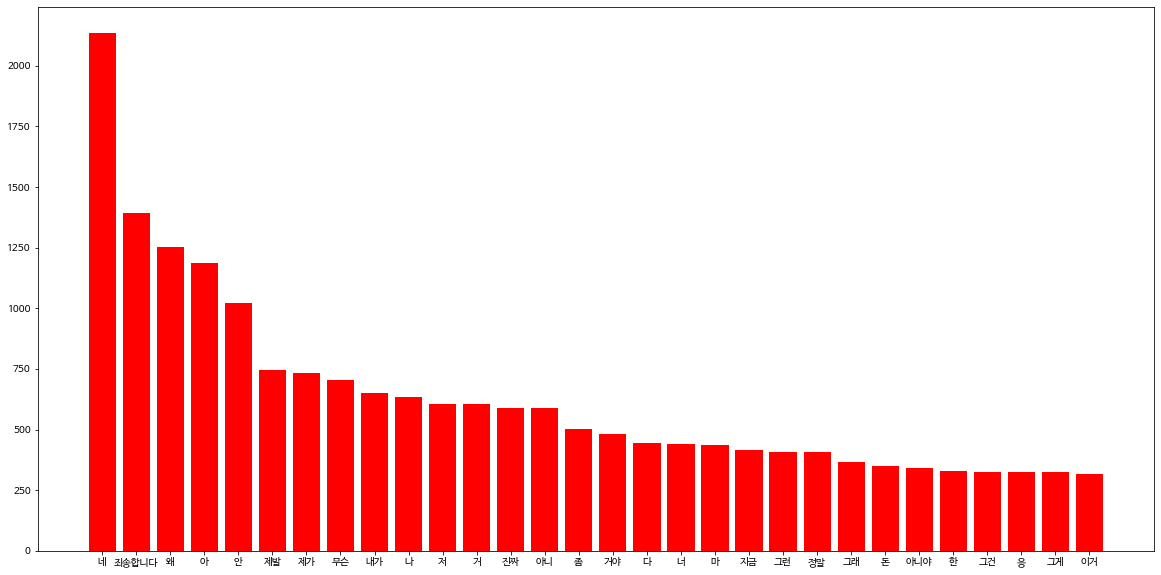

In [81]:
# 피해자 대화 내의 단어 빈도 확인
token = []

for x in victim_corpus:
  for i in x:
    token.append(i)
    
dic = defaultdict(int)
for word in token:
  dic[word] += 1

top = sorted(dic.items(), key=lambda x : x[1], reverse=True)[:30] # 1

x, y = zip(*top) # 2
plt.rcParams['figure.figsize'] = (20, 10)
plt.bar(x, y, color='red')